<a href="https://colab.research.google.com/github/jmacedo91/Exploratory-Data-Analysis/blob/main/001%20-%20CO%E2%82%82%20Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO₂ Emission in the World 🏭

## About Dataset

The impact of greenhouse gas emissions, particularly carbon dioxide (CO₂), on the earth's climate has become an increasingly important issue in recent years. CO₂ emissions are produced by a variety of human activities, including the burning of fossil fuels, deforestation, and industrial processes. Understanding how much CO₂ each country is emitting is crucial in developing effective climate policies and mitigating the effects of climate change.

The CO₂ emissions dataset provides a comprehensive overview of the amount of CO₂ emitted by each country. The dataset includes information on CO₂ emissions by country from 1960 to the present day. It covers all countries in the world and is compiled from various sources, including the United Nations Framework Convention on Climate Change (UNFCCC) and the International Energy Agency (IEA).

The dataset can be used by researchers, policymakers, and the general public to gain insight into the relative contributions of different countries to global CO₂ emissions. It can also be used to monitor changes in emissions over time and to assess the effectiveness of climate policies.

Overall, the CO₂ emissions dataset is an important resource for understanding the global climate challenge and for developing strategies to mitigate the impact of CO₂ emissions on our planet.

The dataset is available at https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country

# 1. Importando as Bibliotecas

In [1]:
# Data Analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Data Visualization
import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize = (18, 7.5))

import warnings
warnings.filterwarnings("ignore")

## 1.1 Conhecendo os dados

In [2]:
df = pd.read_csv('Datasets/co2_emissions_kt_by_country.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [4]:
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [5]:
print(f"A série histórica contemplada nos dados abrange o período de {df['year'].min()} até {df['year'].max()}.")

A série histórica contemplada nos dados abrange o período de 1960 até 2019.


In [6]:
df['country_name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding

Analisando os valores encontrados na coluna rotulada como nome dos países ("country_names"), encontramos também nomes de blocos econômicos e regiões geográficas que representam um conjunto de federações.

# 2. Analisando os Dados

## 2.1 Emissão de CO₂ pelos países do G20

### 2.1.1 Emissão Total de CO₂ durante toda a série histórica

Analisando os países contidos nos dados percebemos que a relação apresenta nomes de blocos econômicos e regiões geográficas que englobam diversas federações.

Inicialmente o foco do estudo se concentrará nos países do G20.

Criado em 1999, o G20 reúne as maiores economias do mundo, incluindo países desenvolvidos e economias emergentes. Funciona, essencialmente, como foro para o diálogo e a cooperação internacional sobre temas econômicos e de desenvolvimento. [1]

Os membros permanentes são África do Sul, Alemanha, Arábia Saudita, Argentina, Austrália, Brasil, Canadá, China, Coreia do Sul, Estados Unidos, França, Índia, Indonésia, Itália, Japão, México, Reino Unido, Rússia, Turquia e União Europeia. Esses países representam 80% do Produto Interno Bruto (PIB) global, 75% das exportações, cerca de 70% dos investimentos diretos estrangeiros e 60% da população mundial. [1]

Alemanha e Turquia são dois países que mudaram de nome durante sua história. Alemanha passou pelo processo de reunificação em 1990 [2] e a Turquia mudou a nomenclatura Turkey para Turkiye [3].

In [7]:
df = df.replace({'Turkey': 'Turkiye'}, regex=True)

In [8]:
G20_countries = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 
       'France', 'Germany', 'India', 'Indonesia', 'Italy', 
       'Japan', 'Korea, Rep.', 'Mexico', 'Russian Federation', 'Saudi Arabia', 
       'South Africa', 'Turkiye', 'United Kingdom', 'United States', 'European Union']

In [9]:
G20 = pd.DataFrame()

In [10]:
for country in G20_countries:
    G20 = pd.concat([G20, df[df['country_name'] == country]])

In [11]:
G20['country_name'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France',
       'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Korea, Rep.',
       'Mexico', 'Russian Federation', 'Saudi Arabia', 'South Africa',
       'Turkiye', 'United Kingdom', 'United States', 'European Union'],
      dtype=object)

Os valores da série histórica foram agrupados para identificação dos principais emissores de CO₂ durante esse período.

In [12]:
rank_G20 = G20.groupby(by='country_name').sum()
rank_G20 = rank_G20.reset_index()
rank_G20 = rank_G20.sort_values(by='value', ascending=False)[['country_name', 'value']]
rank_G20.index = [x for x in range(len(rank_G20))]

In [13]:
rank_G20

,country_name,value
0,United States,2.840366e+08
1,China,2.159975e+08
2,European Union,1.945354e+08
3,Russian Federation,1.344118e+08
4,Japan,5.726082e+07
5,India,4.816875e+07
6,United Kingdom,3.278625e+07
7,Canada,2.609352e+07
8,Germany,2.436702e+07
9,France,2.296071e+07


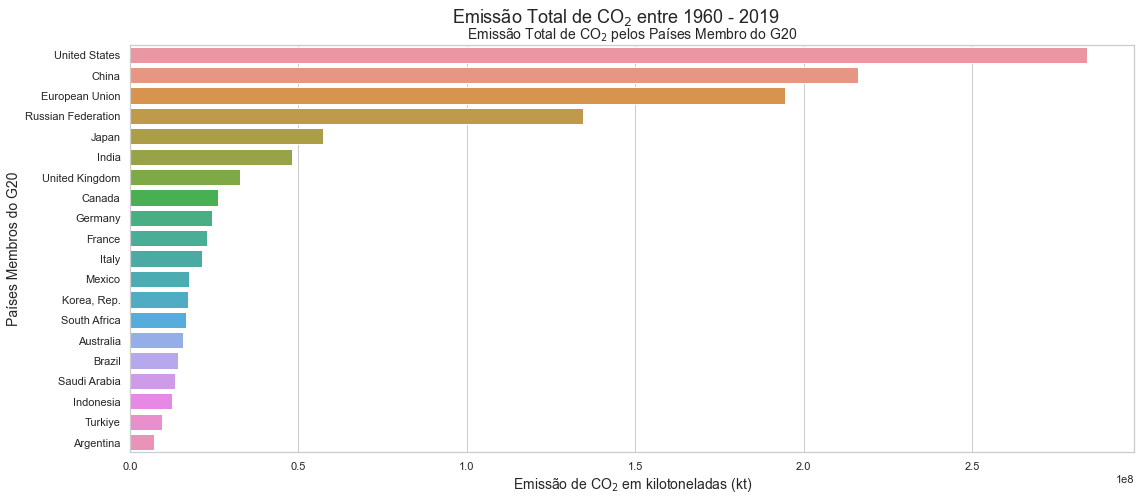

In [14]:
ax = sns.barplot(data=rank_G20, y='country_name', x='value', orient='h')
plt.suptitle('Emissão Total de CO$_2$ entre 1960 - 2019', x = 0.5, y = 0.95, fontsize = 18)
plt.title('Emissão Total de CO$_2$ pelos Países Membro do G20', x = 0.5, y = 1.0, fontsize = 14)
ax.set_xlabel('Emissão de CO$_2$ em kilotoneladas (kt)', fontsize = 14)
ax.set_ylabel('Países Membros do G20', fontsize = 14)
ax = ax

Em uma primeira análise é possível notar que o volume total de dióxido de carbono emitido nos últimos 60 anos por Estados Unidos, China, União Européia e Rússia destoam dos demais países. Considerando apenas os membros do G20 vamos avaliar a fração desse consumo.

In [15]:
rank_G20['G20 proportion'] = round(rank_G20['value'] / rank_G20['value'].sum(), 3)
rank_G20['G20 percentage (%)'] = rank_G20['G20 proportion'] * 100

In [16]:
rank_G20

,country_name,value,G20 proportion,G20 percentage (%)
0,United States,2.840366e+08,0.240,24.0
1,China,2.159975e+08,0.182,18.2
2,European Union,1.945354e+08,0.164,16.4
3,Russian Federation,1.344118e+08,0.113,11.3
4,Japan,5.726082e+07,0.048,4.8
5,India,4.816875e+07,0.041,4.1
6,United Kingdom,3.278625e+07,0.028,2.8
7,Canada,2.609352e+07,0.022,2.2
8,Germany,2.436702e+07,0.021,2.1
9,France,2.296071e+07,0.019,1.9


A participação dos EUA na emissão de CO₂ é de aproximadamente 25% entre os membros do G20. A China aparece em segundo lugar com quase 20% na participação de emissão de CO₂ na atmosfera, vale lembrar que a partir de 1978 a China passou por diversas reformas políticas e econômicas que a aproximaram do restante do mundo. Entre 1978 até 2018, o PIB chinês cresceu de US\$ 150 bilhões para US\$ 12,2 trilhões, uma das maiores taxas no mundo. Ainda, em 2010, o país se tornou a segunda maior economia do globo permanecendo nesta posição desde então. [4]

In [17]:
total_world = df[df['country_name'] == "World"].groupby("country_name").sum()['value'][0]

In [18]:
rank_G20['World Percentage (%)'] = round(rank_G20['value'] / total_world, 3) * 100

In [19]:
rank_G20

,country_name,value,G20 proportion,G20 percentage (%),World Percentage (%)
0,United States,2.840366e+08,0.240,24.0,21.6
1,China,2.159975e+08,0.182,18.2,16.4
2,European Union,1.945354e+08,0.164,16.4,14.8
3,Russian Federation,1.344118e+08,0.113,11.3,10.2
4,Japan,5.726082e+07,0.048,4.8,4.3
5,India,4.816875e+07,0.041,4.1,3.7
6,United Kingdom,3.278625e+07,0.028,2.8,2.5
7,Canada,2.609352e+07,0.022,2.2,2.0
8,Germany,2.436702e+07,0.021,2.1,1.8
9,France,2.296071e+07,0.019,1.9,1.7


Quando os valores de emissão de total de CO₂ são comparados em proporção mundial percebe-se que a variação não apresentam grandes diferenças em relação à emissão total dos países que compõem o G20.

Essa diferença é pequena pois os países membros do G20 representam cerca de 90% da emissão total de CO₂ do mundo.

In [20]:
# Relação Emissão Total de CO₂ G20 / Emissão Total de CO₂ Mundial
round(rank_G20['value'].sum() / total_world, 3)

0.9

A produção de gases de efeito estufa tem aumentado entre todos os membros do G20, principalmente em nações como Argentina, China, Índia e Indonésia. O Relatório de Transparência Climática, apresentado nas vésperas da 26º Conferência do Clima (COP26), prevê que as emissões de CO₂ tendem a aumentar nos próximos anos. [5]

### 2.1.2 Evolução da série histórica da emissão de CO₂ durante o período de 1960 até 2019

Voltando aos dados que contemplam toda a série histórica da emissão de CO₂ dos países membros do G20, vamos analisar como a emissão dos gases se alterou durante cada ano do período estudado.

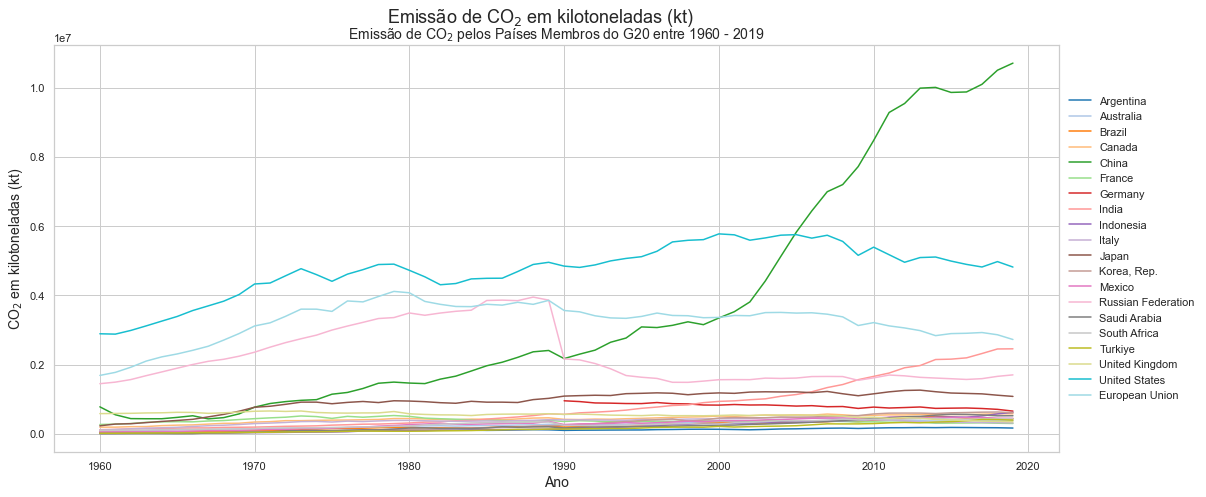

In [21]:
ax = sns.lineplot(data=G20, x='year', y='value', hue='country_name', palette='tab20')
ax.set_xlabel('Ano', fontsize = 14)
ax.set_ylabel('CO$_2$ em kilotoneladas (kt)', fontsize = 14)
plt.suptitle('Emissão de CO$_2$ em kilotoneladas (kt)', x = 0.5, y = 0.95, fontsize = 18)
plt.title('Emissão de CO$_2$ pelos Países Membros do G20 entre 1960 - 2019', x = 0.5, y = 1.0, fontsize = 14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='white')
ax = ax

Em uma primeira análise é possível notar como o valor das emissões de CO₂ foi acelerado a partir dos anos 2000. Para melhorar a visualização do gráfico vamos considerar somente os 5 primeiros países do rank.

In [22]:
G5 = pd.DataFrame()

for country in rank_G20['country_name'][:5]:
    G5 = pd.concat([G5, df[df['country_name'] == country]])

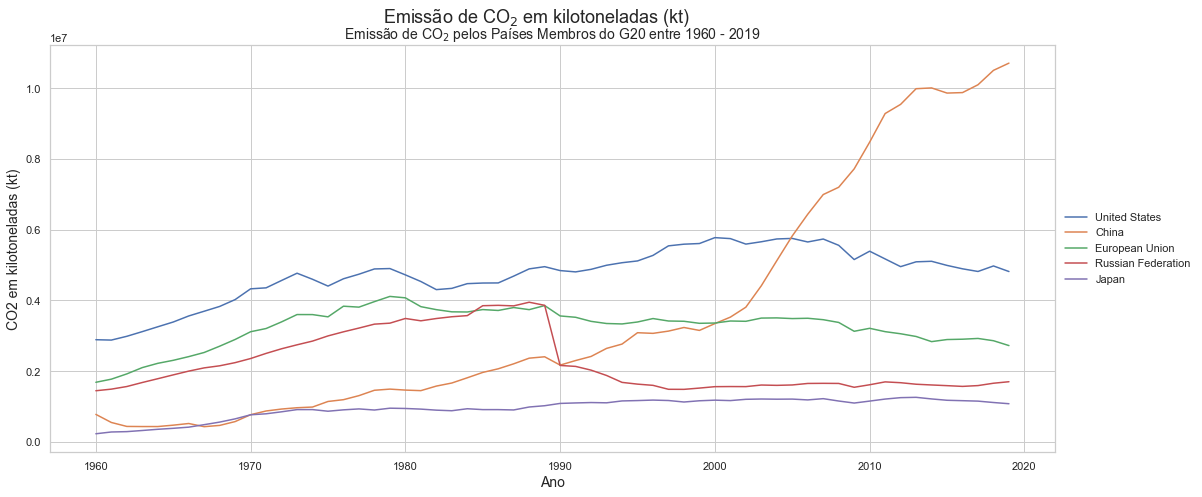

In [23]:
ax = sns.lineplot(data=G5, x='year', y='value', hue='country_name')
ax.set_xlabel('Ano', fontsize = 14)
ax.set_ylabel('CO2 em kilotoneladas (kt)', fontsize = 14)
plt.suptitle('Emissão de CO$_2$ em kilotoneladas (kt)', x = 0.5, y = 0.95, fontsize = 18)
plt.title('Emissão de CO$_2$ pelos Países Membros do G20 entre 1960 - 2019', x = 0.5, y = 1.0, fontsize = 14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='white')
ax = ax

In [24]:
G20_pivot = G20.pivot(index='year', columns='country_name', values='value')

In [25]:
G20_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1960 to 2019
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Argentina           60 non-null     float64
 1   Australia           60 non-null     float64
 2   Brazil              60 non-null     float64
 3   Canada              60 non-null     float64
 4   China               60 non-null     float64
 5   European Union      60 non-null     float64
 6   France              60 non-null     float64
 7   Germany             30 non-null     float64
 8   India               60 non-null     float64
 9   Indonesia           60 non-null     float64
 10  Italy               60 non-null     float64
 11  Japan               60 non-null     float64
 12  Korea, Rep.         60 non-null     float64
 13  Mexico              60 non-null     float64
 14  Russian Federation  60 non-null     float64
 15  Saudi Arabia        60 non-null     float64
 16  South

In [26]:
G20_pivot.head()

country_name,Argentina,Australia,Brazil,Canada,China,European Union,France,Germany,India,Indonesia,Italy,Japan,"Korea, Rep.",Mexico,Russian Federation,Saudi Arabia,South Africa,Turkiye,United Kingdom,United States
year,,,,,,,,,,,,,,,,,,,,
1960,48815.104,88202.351,46908.264,192895.201,780726.302,1.687911e+06,271218.654,NaN,120581.961,21404.279,109357.274,232781.160,12552.141,63116.404,1448637.349,2676.910,97934.569,16820.529,584299.780,2890696.100
1961,51180.319,90589.568,49203.806,194182.318,552066.850,1.775817e+06,281211.229,NaN,130402.187,26024.699,124549.655,283118.069,14462.648,65305.603,1493932.133,3571.658,102213.958,17363.245,588938.535,2880505.507
1962,53695.881,94912.961,53695.881,207185.500,440359.029,1.924617e+06,298706.486,NaN,143467.708,22995.757,146456.313,293220.654,17278.904,63809.467,1567950.528,6255.902,105767.281,21631.633,593360.937,2987207.873
1963,50083.886,101029.517,55617.389,211109.190,436695.696,2.102661e+06,334019.696,NaN,154083.673,22783.071,164780.312,325222.563,21103.585,66361.699,1681524.852,6945.298,109826.650,22669.394,603822.888,3119230.874
1964,55727.399,108979.573,56735.824,237801.283,436923.050,2.223324e+06,345303.055,NaN,150647.694,22394.369,175957.328,359318.329,22218.353,74278.752,1788304.225,7047.974,119657.877,26336.394,608355.300,3255995.306


In [27]:
G20_pivot.cumsum().head()

country_name,Argentina,Australia,Brazil,Canada,China,European Union,France,Germany,India,Indonesia,Italy,Japan,"Korea, Rep.",Mexico,Russian Federation,Saudi Arabia,South Africa,Turkiye,United Kingdom,United States
year,,,,,,,,,,,,,,,,,,,,
1960,48815.104,88202.351,46908.264,192895.201,780726.302,1.687911e+06,271218.654,NaN,120581.961,21404.279,109357.274,232781.160,12552.141,63116.404,1448637.349,2676.910,97934.569,16820.529,584299.780,2.890696e+06
1961,99995.423,178791.919,96112.070,387077.519,1332793.152,3.463727e+06,552429.883,NaN,250984.148,47428.978,233906.929,515899.229,27014.789,128422.007,2942569.482,6248.568,200148.527,34183.774,1173238.315,5.771202e+06
1962,153691.304,273704.880,149807.951,594263.019,1773152.181,5.388345e+06,851136.369,NaN,394451.856,70424.735,380363.242,809119.883,44293.693,192231.474,4510520.010,12504.470,305915.808,55815.407,1766599.252,8.758409e+06
1963,203775.190,374734.397,205425.340,805372.209,2209847.877,7.491006e+06,1185156.065,NaN,548535.529,93207.806,545143.554,1134342.446,65397.278,258593.173,6192044.862,19449.768,415742.458,78484.801,2370422.140,1.187764e+07
1964,259502.589,483713.970,262161.164,1043173.492,2646770.927,9.714330e+06,1530459.120,NaN,699183.223,115602.175,721100.882,1493660.775,87615.631,332871.925,7980349.087,26497.742,535400.335,104821.195,2978777.440,1.513364e+07


In [28]:
# Vídeo disponível no repositório
# import bar_chart_race as bcr
# bcr.bar_chart_race(df=G20_pivot.cumsum(), 
#                    title="Emissão de CO$_2$ 1960 - 2019",
#                    filename="Outputs/emissao_co2.mp4")

## 2.2 Explorando o Aumento da Emissão de CO₂ pela China

Nesse tópico vamos explorar a emissão de CO₂ pela China durante todo a série histórica disponível.

In [29]:
china = df[df['country_name'] == 'China']

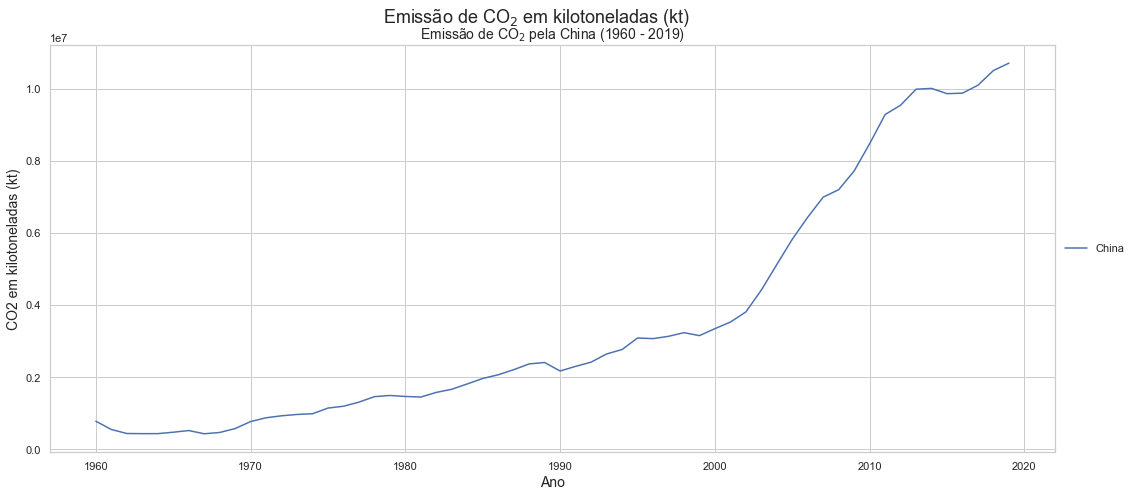

In [30]:
ax = sns.lineplot(data=china, x='year', y='value', hue='country_name')
ax.set_xlabel('Ano', fontsize = 14)
ax.set_ylabel('CO2 em kilotoneladas (kt)', fontsize = 14)
plt.suptitle('Emissão de CO$_2$ em kilotoneladas (kt)', x = 0.5, y = 0.95, fontsize = 18)
plt.title('Emissão de CO$_2$ pela China (1960 - 2019)', x = 0.5, y = 1.0, fontsize = 14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='white')
ax = ax

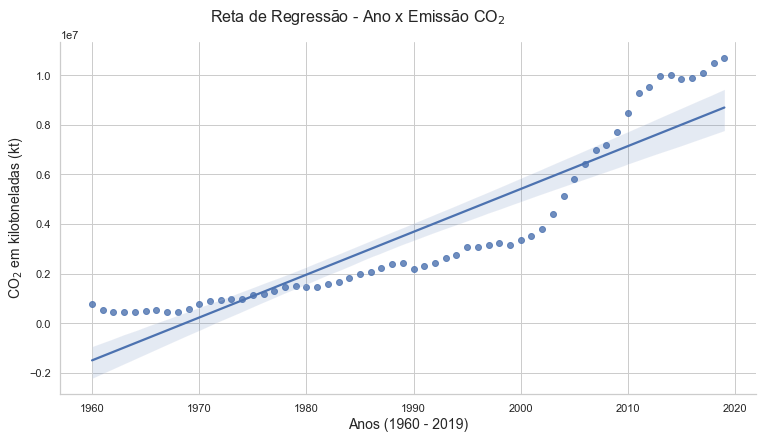

In [31]:
ax = sns.lmplot(data=china, x='year', y='value')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Ano x Emissão CO$_2$', fontsize=16, y=1.02)
ax.set_xlabels("Anos (1960 - 2019)", fontsize=14)
ax.set_ylabels("CO$_2$ em kilotoneladas (kt)", fontsize=14)
ax = ax

Explorando o coeficiente de correlação de Pearson é possível notar que quando os períodos são analisados individualmente os valores apresentam uma correlação mais forte.

In [32]:
corr_all_period = china[['year', 'value']].corr().loc['year']['value']
corr_until_2000 = china[china['year'] <= 2000][['year', 'value']].corr().loc['year']['value']
corr_after_2000 = china[china['year'] > 2000][['year', 'value']].corr().loc['year']['value']

pd.DataFrame({'Correlation': [corr_all_period, corr_until_2000, corr_after_2000]}, 
              index=['1969-2019', '1969-2000', '2001-2019'])

,Correlation
1969-2019,0.912331
1969-2000,0.978877
2001-2019,0.967879


Como vimos anteriormente, a China apresentou um aumento drástico nas emissões de CO₂ a partir dos anos 2000. Vamos explorar esse coeficiente de forma separada.

### 2.2.2 China 1960 - 2000

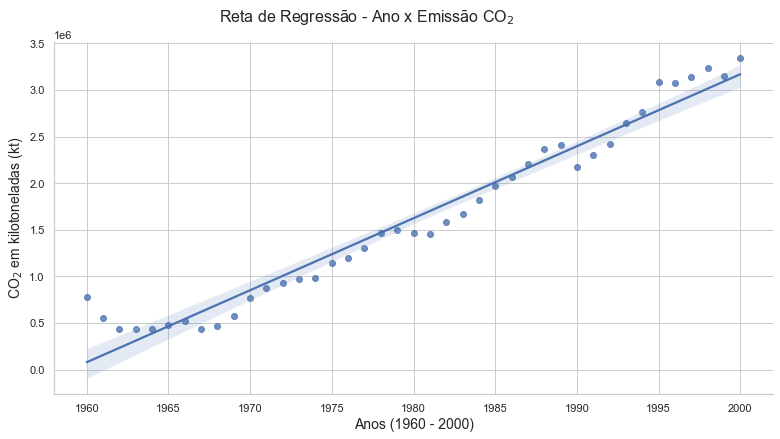

In [33]:
ax = sns.lmplot(data=china[china['year'] <= 2000], x='year', y='value')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Ano x Emissão CO$_2$', fontsize=16, y=1.02)
ax.set_xlabels("Anos (1960 - 2000)", fontsize=14)
ax.set_ylabels("CO$_2$ em kilotoneladas (kt)", fontsize=14)
ax = ax

In [34]:
Y = china[china['year'] <= 2000][['year', 'value']]['value']

In [35]:
X = sm.add_constant(china[china['year'] <= 2000][['year', 'value']]['year'])

In [36]:
regression_1969_2000 = sm.OLS(Y, X).fit()

In [37]:
regression_1969_2000.params

const   -1.512329e+08
year     7.720079e+04
dtype: float64

In [38]:
print(regression_1969_2000.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     894.0
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.68e-28
Time:                        21:27:45   Log-Likelihood:                -556.69
No. Observations:                  41   AIC:                             1117.
Df Residuals:                      39   BIC:                             1121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.512e+08   5.11e+06    -29.582      0.0

# $$Y_i = \beta_1 + \beta_2X_i$$

# $$Y_i = (-1,5123.10^{8}) + 7,7201.10^{4}X_i$$

In [39]:
beta_2 = regression_1969_2000.params[1]
beta_1 = regression_1969_2000.params[0]

In [40]:
def previsao(ano):
    y = beta_1 + beta_2 * ano
    return y

In [41]:
previsao(1993)

2628272.003194213

In [42]:
china[china['year'] == 1993]

,country_code,country_name,year,value
2133,CHN,China,1993,2645410.0


### 2.2.3 China 2001 - 2019

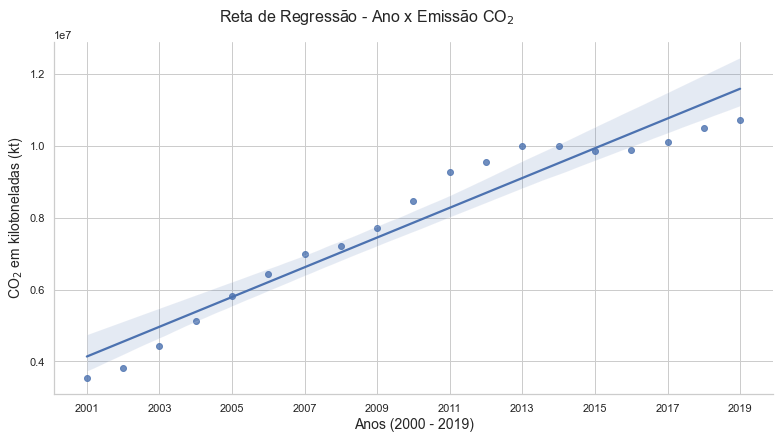

In [43]:
ax = sns.lmplot(data=china[china['year'] > 2000], x='year', y='value')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Ano x Emissão CO$_2$', fontsize=16, y=1.02)
ax.set_xlabels("Anos (2000 - 2019)", fontsize=14)
ax.set_ylabels("CO$_2$ em kilotoneladas (kt)", fontsize=14)
plt.xticks([x for x in range(2001, 2020, 2)])
ax = ax

In [44]:
Y_2 = china[china['year'] > 2000][['year', 'value']]['value']

In [45]:
X_2 = sm.add_constant(china[china['year'] > 2000][['year', 'value']]['year'])

In [46]:
regression_2001_2019 = sm.OLS(Y_2, X_2).fit()

In [47]:
regression_2001_2019.params

const   -8.246559e+08
year     4.141882e+05
dtype: float64

In [48]:
print(regression_2001_2019.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     251.9
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.26e-11
Time:                        21:27:46   Log-Likelihood:                -279.41
No. Observations:                  19   AIC:                             562.8
Df Residuals:                      17   BIC:                             564.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.247e+08   5.24e+07    -15.723      0.0

# $$Y_i = \beta_1 + \beta_2X_i$$

# $$Y_i = (-8.2465.10^{8}) + 4,1418.10^{5}X_i$$

In [49]:
beta_2 = regression_2001_2019.params[1]
beta_1 = regression_2001_2019.params[0]

In [50]:
def previsao_2001_2019(ano):
    y = beta_1 + beta_2 * ano
    return y

In [51]:
previsao_2001_2019(2015)

9933379.011101961

In [52]:
china[china['year'] == 2015]['value']

2155    9.861100e+06
Name: value, dtype: float64

### 2.2.4 Comparando os períodos

In [53]:
pd.DataFrame({'1969-2000': [corr_until_2000, regression_1969_2000.params[1]], 
              '2001-2019': [corr_after_2000, regression_2001_2019.params[1]]},
             index=['Correlação', 'Coeficiente Angular'])

,1969-2000,2001-2019
Correlação,0.978877,0.967879
Coeficiente Angular,77200.787940,414188.231086


Percebemos que a taxa de emissão de CO₂ da China teve um grande aumento a partir dos anos 2000 passando de 77200 kilotons/ano para 414188 kilotons/ano.

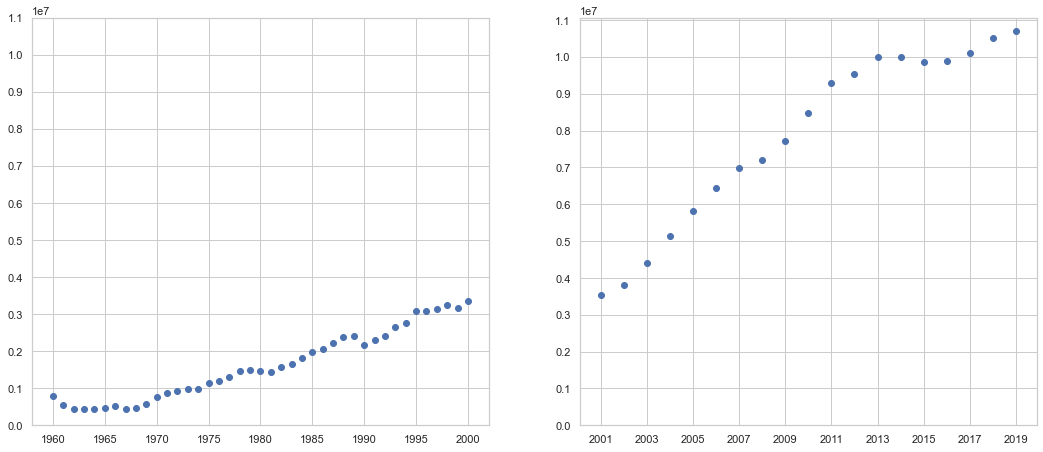

In [54]:
plt.subplot(1,2,1)
plt.scatter(x=china[china['year'] <= 2000][['year', 'value']]['year'],
            y=china[china['year'] <= 2000][['year', 'value']]['value'])
plt.yticks([x for x in range(0, 12_000_000, 1_000_000)])
plt.xticks([x for x in range(1960, 2001, 5)])

plt.subplot(1,2,2)
plt.scatter(x=china[china['year'] > 2000][['year', 'value']]['year'],
            y=china[china['year'] > 2000][['year', 'value']]['value'])
plt.yticks([x for x in range(0, 12_000_000, 1_000_000)])
plt.xticks([x for x in range(2001, 2020, 2)])

plt.show()

### 2.2.5 Analisando o processo de aceleração de emissão de CO₂ pela China

In [55]:
china['year'] = pd.to_datetime(china['year'], format="%Y")

In [56]:
china['aumento'] = china['value'].diff()

In [57]:
china.dtypes

country_code            object
country_name            object
year            datetime64[ns]
value                  float64
aumento                float64
dtype: object

In [58]:
china.head(10)

,country_code,country_name,year,value,aumento
2100,CHN,China,1960-01-01,780726.302,NaN
2101,CHN,China,1961-01-01,552066.850,-228659.452
2102,CHN,China,1962-01-01,440359.029,-111707.821
2103,CHN,China,1963-01-01,436695.696,-3663.333
2104,CHN,China,1964-01-01,436923.050,227.354
2105,CHN,China,1965-01-01,475972.933,39049.883
2106,CHN,China,1966-01-01,522789.522,46816.589
2107,CHN,China,1967-01-01,433234.048,-89555.474
2108,CHN,China,1968-01-01,468928.626,35694.578
2109,CHN,China,1969-01-01,577237.138,108308.512


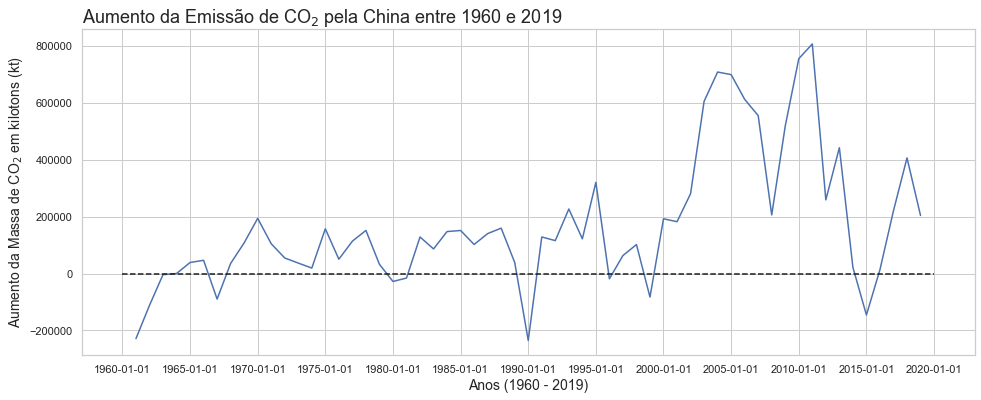

In [59]:
ax = sns.lineplot(data=china, x='year', y='aumento')
ax.figure.set_size_inches(16, 6)
ax.set_title('Aumento da Emissão de CO$_2$ pela China entre 1960 e 2019', loc = 'left', fontsize = 18)
ax.set_xlabel('Anos (1960 - 2019)', fontsize = 14)
ax.set_ylabel('Aumento da Massa de CO$_2$ em kilotons (kt)', fontsize = 14)
ax.hlines(y = 0, 
          xmin = pd.to_datetime(1960, format="%Y"), 
          xmax = pd.to_datetime(2020, format="%Y"), 
          colors='k', 
          linestyles='dashed')
plt.xticks([str(x) for x in range(1960, 2021, 5)])
ax = ax

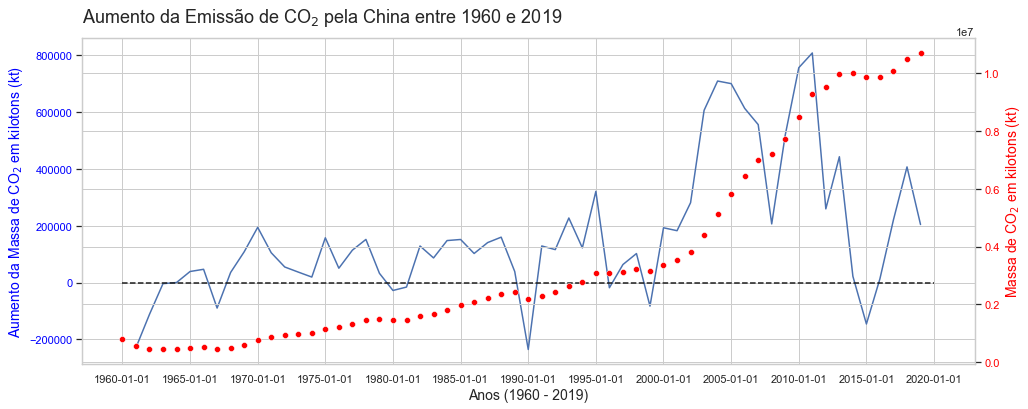

In [60]:
ax = sns.lineplot(data=china, x='year', y='aumento')
ax.figure.set_size_inches(16, 6)
ax.set_title('Aumento da Emissão de CO$_2$ pela China entre 1960 e 2019', loc = 'left', fontsize = 18, y=1.03)
ax.set_xlabel('Anos (1960 - 2019)', fontsize = 14)
ax.set_ylabel('Aumento da Massa de CO$_2$ em kilotons (kt)', fontsize = 14, color="blue")
for label in ax.get_yticklabels():
    label.set_color("blue")
ax.hlines(y = 0, 
          xmin = pd.to_datetime(1960, format="%Y"), 
          xmax = pd.to_datetime(2020, format="%Y"), 
          colors='k', 
          linestyles='dashed')    
ax = ax

ax2 = ax.twinx()
ax2 = sns.scatterplot(data=china, x='year', y='value', color='red')
ax2.set_ylabel('Massa de CO$_2$ em kilotons (kt)', fontsize = 14, color="red")
plt.xticks([str(x) for x in range(1960, 2021, 5)])
for label in ax2.get_yticklabels():
    label.set_color("red")
ax2 = ax2

No gráfico acima a linha azul indica os períodos em que houve aumento e redução na emissão de CO₂ pela China, a linha preta tracejada separa os valores de aumento e redução.

In [61]:
china['aceleracao'] = china['aumento'].diff()

In [62]:
china.head()

,country_code,country_name,year,value,aumento,aceleracao
2100,CHN,China,1960-01-01,780726.302,NaN,NaN
2101,CHN,China,1961-01-01,552066.850,-228659.452,NaN
2102,CHN,China,1962-01-01,440359.029,-111707.821,116951.631
2103,CHN,China,1963-01-01,436695.696,-3663.333,108044.488
2104,CHN,China,1964-01-01,436923.050,227.354,3890.687


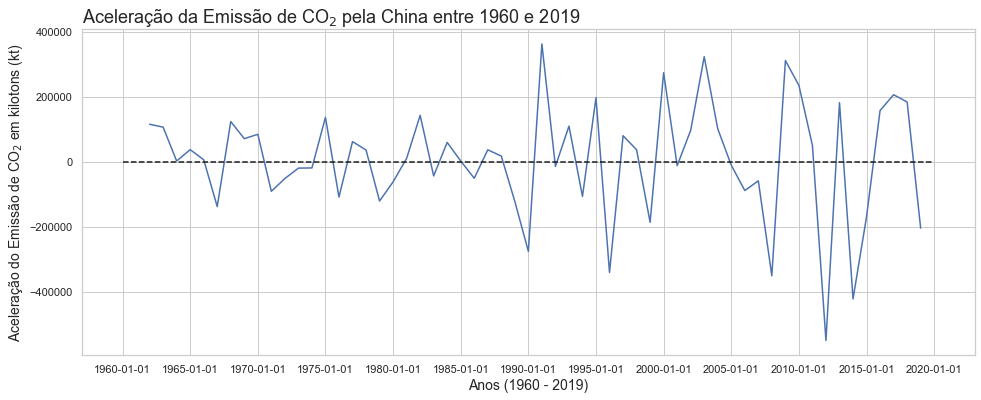

In [63]:
ax = sns.lineplot(data=china, x='year', y='aceleracao')
ax.figure.set_size_inches(16, 6)
ax.set_title('Aceleração da Emissão de CO$_2$ pela China entre 1960 e 2019', loc = 'left', fontsize = 18)
ax.set_xlabel('Anos (1960 - 2019)', fontsize = 14)
ax.set_ylabel('Aceleração do Emissão de CO$_2$ em kilotons (kt)', fontsize = 14)
ax.hlines(y = 0, 
          xmin = pd.to_datetime(1960, format="%Y"), 
          xmax = pd.to_datetime(2020, format="%Y"), 
          colors='k', 
          linestyles='dashed')
plt.xticks([str(x) for x in range(1960, 2021, 5)])
ax = ax

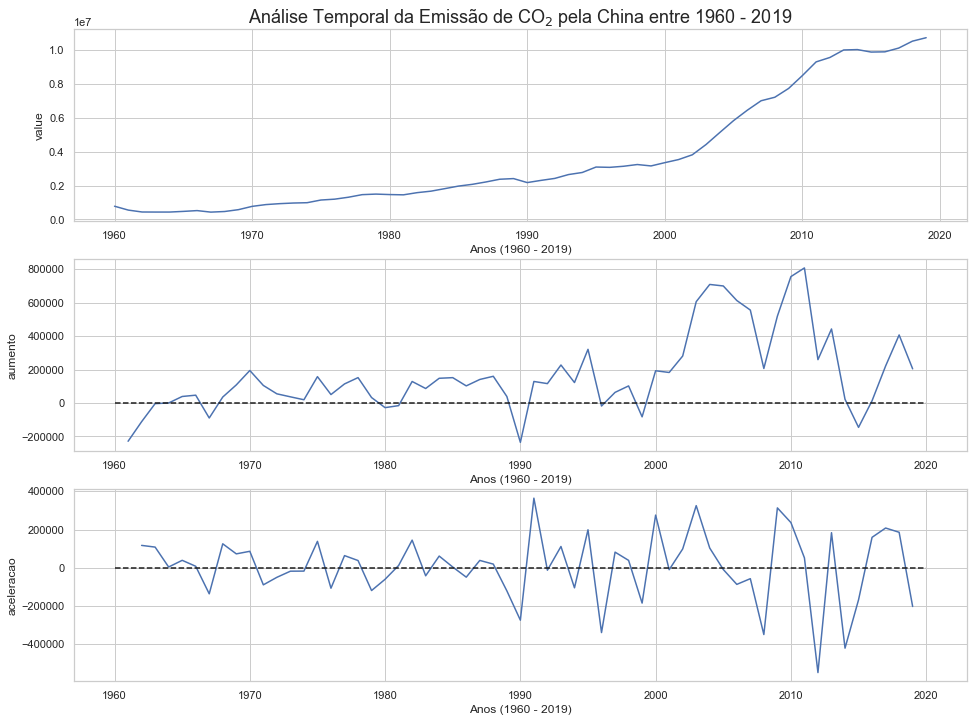

In [64]:
plt.figure(figsize = (16, 12))

ax = plt.subplot(3, 1, 1)
ax.set_title('Análise Temporal da Emissão de CO$_2$ pela China entre 1960 - 2019', fontsize = 18, loc = 'center')
sns.lineplot(data=china, x='year', y='value')
ax.set_xlabel('Anos (1960 - 2019)', fontsize = 12)

ax1 = plt.subplot(3, 1, 2)
sns.lineplot(data=china, x='year', y='aumento')
ax1.set_xlabel('Anos (1960 - 2019)', fontsize = 12)
plt.hlines(y = 0, xmin = pd.to_datetime(1960, format="%Y"), xmax = pd.to_datetime(2020, format="%Y"), colors='k', linestyles='dashed')

ax2 = plt.subplot(3, 1, 3)
sns.lineplot(data=china, x='year', y='aceleracao')
ax2.set_xlabel('Anos (1960 - 2019)', fontsize = 12)
plt.hlines(y = 0, xmin = pd.to_datetime(1960, format="%Y"), xmax = pd.to_datetime(2020, format="%Y"), colors='k', linestyles='dashed')
ax = ax

## 2.3 Desenvolvimento de um modelo preditivo da Emissão de CO₂ para o Brasil

In [65]:
brazil = df[df['country_name'] == 'Brazil'][['country_name','year', 'value']]

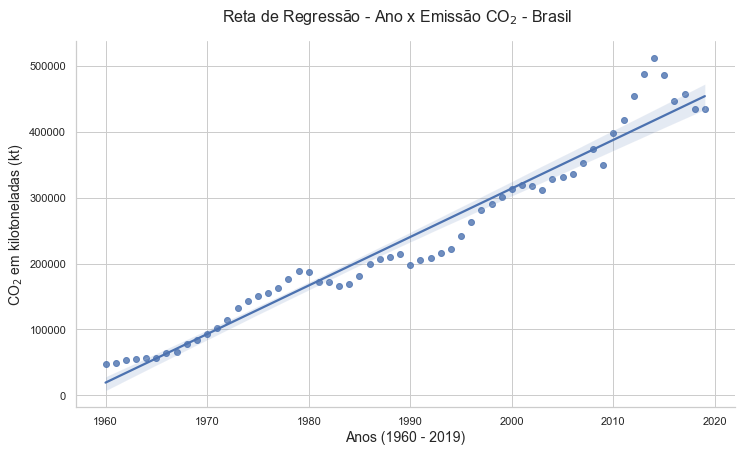

In [66]:
ax = sns.lmplot(data=brazil, x='year', y='value')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Ano x Emissão CO$_2$ - Brasil', fontsize=16, y= 1.05, x= 0.57)
ax.set_xlabels("Anos (1960 - 2019)", fontsize=14)
ax.set_ylabels("CO$_2$ em kilotoneladas (kt)", fontsize=14)
ax = ax

In [67]:
brazil[['year', 'value']].corr()

,year,value
year,1.00000,0.97693
value,0.97693,1.00000


In [68]:
Y = brazil['value']
X = sm.add_constant(brazil['year'])

In [69]:
resultado_regressao = sm.OLS(Y, X).fit()

In [70]:
resultado_regressao.params

const   -1.441438e+07
year     7.364141e+03
dtype: float64

# $$Y_i = \beta_1 + \beta_2X_i$$

In [71]:
beta1 = resultado_regressao.params[0]
beta2 = resultado_regressao.params[1]

# $$Y_i = (-1,4414.10^{7}) + 7,3614.10^{3}X_i$$

In [72]:
def previsao_brasil(ano):
    return beta1 + (beta2 * ano)

In [73]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1214.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.38e-40
Time:                        21:27:51   Log-Likelihood:                -699.27
No. Observations:                  60   AIC:                             1403.
Df Residuals:                      58   BIC:                             1407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.441e+07   4.21e+05    -34.275      0.0

In [74]:
brazil['Emissão Prevista Equação da Reta'] = brazil['year'].apply(previsao_brasil)

In [75]:
brazil['Emissão Prevista StatsModels'] = resultado_regressao.predict()

In [76]:
brazil

,country_name,year,value,Emissão Prevista Equação da Reta,Emissão Prevista StatsModels
1522,Brazil,1960,46908.264000,19339.744428,19339.744428
1523,Brazil,1961,49203.806000,26703.885665,26703.885665
1524,Brazil,1962,53695.881000,34068.026903,34068.026903
1525,Brazil,1963,55617.389000,41432.168140,41432.168140
1526,Brazil,1964,56735.824000,48796.309378,48796.309378
1527,Brazil,1965,56398.460000,56160.450616,56160.450616
1528,Brazil,1966,64304.512000,63524.591853,63524.591853
1529,Brazil,1967,66193.017000,70888.733091,70888.733091
1530,Brazil,1968,77421.371000,78252.874328,78252.874328
1531,Brazil,1969,84315.331000,85617.015566,85617.015566


In [77]:
brazil.drop(['Emissão Prevista StatsModels'], axis=1, inplace=True)

# Referências Bibliográficas

[1] TCU. Líderes de instituições superiores de controle do G20 apontam desafios do mundo pós-pandêmico. Portal TCU, Brasília, 18 mar. 2021. Disponível em: https://portal.tcu.gov.br/imprensa/noticias/lideres-de-instituicoes-superiores-de-controle-do-g20-apontam-desafios-do-mundo-pos-pandemico.htm. Acesso em: 23 mar. 2023.

[2] HISTÓRIA DO MUNDO. Reunificação da Alemanha. [S.l.], 2021. Disponível em: https://www.historiadomundo.com.br/idade-contemporanea/reunicacao-alemanha.htm#. Acesso em: 23 mar. 2023.

[3] EURONEWS. Turkey is now Türkiye. What other countries have changed their name? [S.l.], 2022. Disponível em: https://www.euronews.com/my-europe/2022/06/28/turkey-is-now-turkiye-what-other-countries-have-changed-their-name. Acesso em: 23 mar. 2023.

[4] POLITIZE. Ascensão pacífica chinesa. [S.l.], 2021. Disponível em: https://www.politize.com.br/ascensao-pacifica-chinesa/. Acesso em: 23 mar. 2023.

[5] CORREIO BRAZILIENSE. Emissões de CO2 voltam ao ritmo de pré-pandemia nos países do G20. [S.l.], 14 out. 2021. Disponível em: https://www.correiobraziliense.com.br/ciencia-e-saude/2021/10/4955494-emissoes-de-co2-voltam-ao-ritmo-de-pre-pandemia-nos-paises-do-g20.html. Acesso em: 23 mar. 2023.